In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 生成数据集并展示

In [2]:
n_train, n_test, num_inputs = 7000, 3000, 500
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 2 读取数据

In [3]:
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0)

In [4]:
for X, y in train_iter:
    print(X, y)
    break

tensor([[-1.5575,  0.3833, -2.6898,  ..., -0.0088, -1.2093, -0.3823],
        [ 0.4628, -0.0492, -1.4082,  ...,  0.4004,  2.2627,  1.0497],
        [ 0.4122,  0.6284, -0.0271,  ...,  0.5004, -1.2729,  0.5084],
        ...,
        [ 1.1741, -0.2829, -0.5145,  ..., -0.1534, -0.5047,  0.4115],
        [-0.2344, -1.3113,  0.4459,  ..., -1.1690, -0.3716, -0.7309],
        [-0.1609,  0.3461,  0.5418,  ...,  1.5337, -0.5345,  1.2407]]) tensor([[ 0.0319],
        [ 0.0191],
        [ 0.0297],
        [ 0.0772],
        [ 0.0451],
        [ 0.0483],
        [ 0.1702],
        [-0.0502],
        [ 0.1552],
        [ 0.0524],
        [-0.0503],
        [-0.1771],
        [-0.0451],
        [ 0.1915],
        [-0.0427],
        [ 0.0238],
        [-0.0843],
        [ 0.0409],
        [ 0.2435],
        [ 0.0500],
        [-0.0622],
        [ 0.0590],
        [ 0.0767],
        [-0.0285],
        [ 0.3230],
        [ 0.3241],
        [ 0.2010],
        [ 0.1380],
        [-0.0856],
        [ 0.008

## 3 初始化模型参数

In [5]:
num_inputs, num_outputs, num_hiddens = 500, 1, 200

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

## 4 定义模型

In [6]:
# 定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

def net(X):
    X = X.view((-1, num_inputs))
    H = torch.mm(X, W1) + b1
    return torch.mm(H, W2) + b2

## 5 定义损失函数

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 6 定义优化算法

In [8]:
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

## 7 定义loss画图函数

In [9]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 8 训练模型

In [10]:
def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            # 反向传播 + 更新优化参数
            l.backward()
            if optimizer == None:
                SGD(params, lr)
            else:
                optimizer.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])

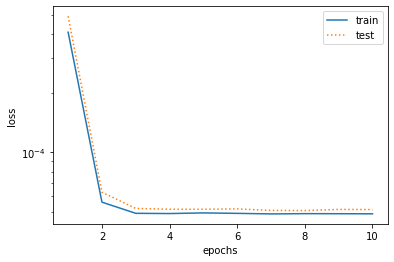

In [11]:
num_epochs = 10
lr = 0.003
train(net, train_iter, test_iter, squared_loss, num_epochs, batch_size, params, lr)